**KNN Classification**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
zoo = pd.read_csv('/content/Zoo.csv')

In [ ]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [ ]:
zoo[zoo['animal name'] == 'frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [ ]:
# observation: find that one frog is venomous and another one is not
# change the venomous one into frog2 to seperate 2 kinds of frog

zoo['animal name'][(zoo['venomous']==1) &(zoo['animal name']=='frog')] = 'frog2'

<ipython-input-11-589a094076c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoo['animal name'][(zoo['venomous']==1) &(zoo['animal name']=='frog')] = 'frog2'


In [ ]:
zoo['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [ ]:
zoo.head(27)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [ ]:
#finding unique value of hair
color_hair=[('red' if i == 1 else 'blue' if i ==0 else 'green') for i in zoo.hair]
color_hair

['red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'blue']

In [ ]:
list(set(color_hair))

['red', 'blue']

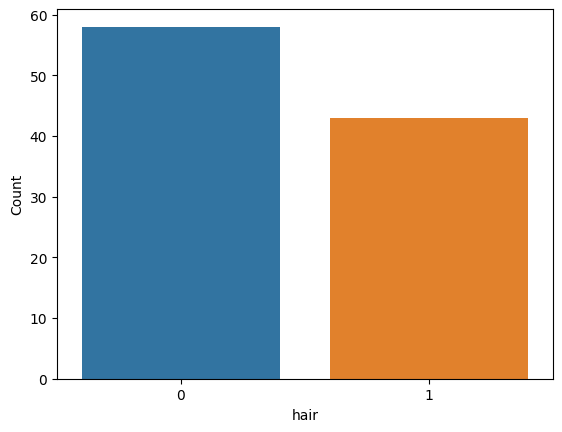

0    58
1    43
Name: hair, dtype: int64

In [ ]:
sns.countplot(x='hair', data=zoo)
plt.xlabel('hair')
plt.ylabel('Count')
plt.show()
zoo.loc[:,'hair'].value_counts()

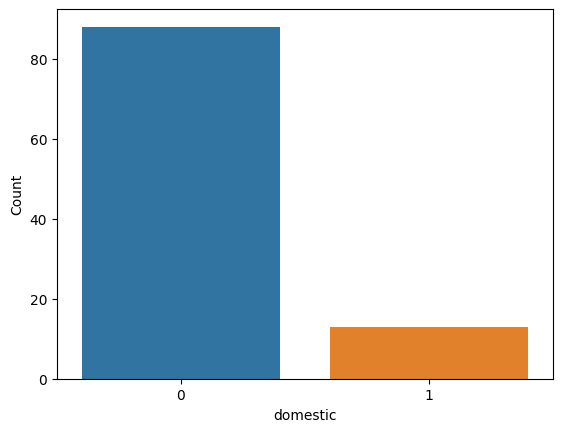

0    58
1    43
Name: hair, dtype: int64

In [ ]:
sns.countplot(x='domestic', data=zoo)
plt.xlabel('domestic')
plt.ylabel('Count')
plt.show()
zoo.loc[:,'hair'].value_counts()

In [ ]:
# we can see most animals are not domestic

In [ ]:
pd.crosstab(zoo['domestic'],zoo['type'])

type,1,2,3,4,5,6,7
domestic,,,,,,,
0,33,17,5,12,4,7,10
1,8,3,0,1,0,1,0


[]

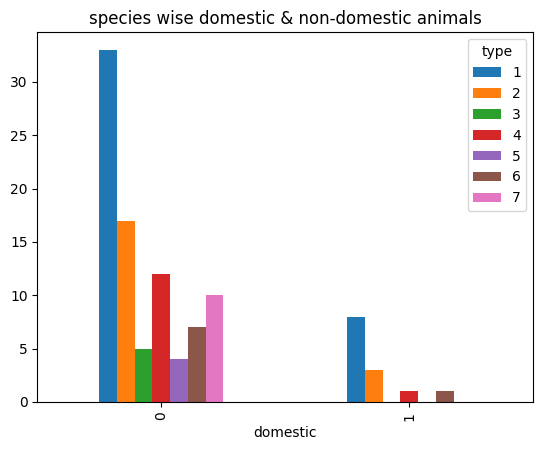

In [ ]:
#species wise domestic & non-domestic animals
pd.crosstab(zoo['domestic'],zoo['type']).plot(kind='bar', title='species wise domestic & non-domestic animals')
plt.plot()

In [ ]:
# how many animals provides us milk
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [ ]:
pd.crosstab(zoo['type'],zoo['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


[]

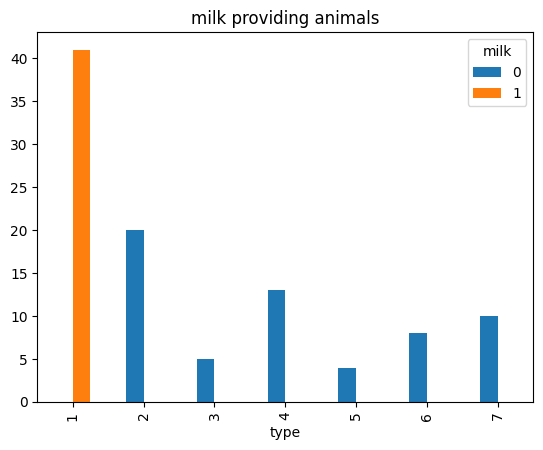

In [ ]:
pd.crosstab(zoo['type'],zoo['milk']).plot(kind='bar',title='milk providing animals')
plt.plot()

In [ ]:
zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [ ]:
pd.crosstab(zoo['type'],zoo['aquatic'])

aquatic,0,1
type,,
1,35,6
2,14,6
3,4,1
4,0,13
5,0,4
6,8,0
7,4,6


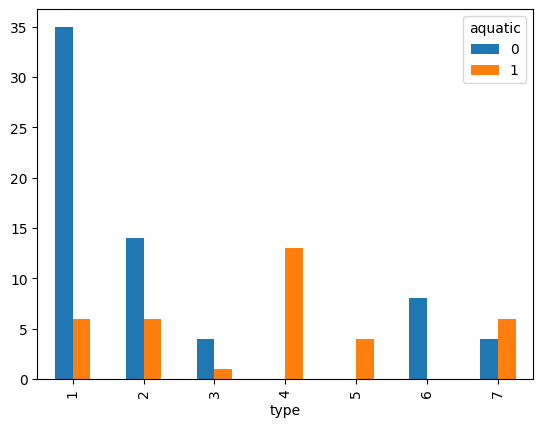

In [ ]:
pd.crosstab(zoo['type'],zoo['aquatic']).plot(kind='bar')
plt.show()

In [ ]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
#split train test data into 70/30
from sklearn.model_selection import train_test_split
x = zoo.iloc[:,1:16]
y = zoo.iloc[:,16]
x_train , x_test , y_train , y_test = train_test_split(x ,y, random_state=1, stratify=y)

In [ ]:
x_train , x_test , y_train , y_test

(    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
 69     1         0     0     1         0        0         1        1   
 67     1         0     0     1         0        0         1        1   
 90     0         0     1     0         0        0         0        0   
 48     1         0     0     1         0        1         1        1   
 55     1         0     0     1         0        0         0        1   
 ..   ...       ...   ...   ...       ...      ...       ...      ...   
 83     0         1     1     0         1        0         0        0   
 59     0         1     1     0         1        0         0        0   
 4      1         0     0     1         0        0         1        1   
 50     1         0     0     1         0        0         1        1   
 77     0         0     1     0         0        1         1        0   
 
     backbone  breathes  venomous  fins  legs  tail  domestic  
 69         1         1         0     0     4     1       

In [ ]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
69,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
90,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
59,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
50,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0


In [ ]:
y_train

69    1
67    1
90    1
48    1
55    1
     ..
83    0
59    0
4     1
50    1
77    0
Name: catsize, Length: 75, dtype: int64

In [ ]:
kfold=KFold(n_splits=10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#predicting on test dataset
pred = model.predict(x_test)
pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1])

In [ ]:
#getting the count of each category
pd.Series(pred).value_counts()

0    16
1    10
dtype: int64

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1
catsize,,
0,13,2
1,3,8


In [ ]:
np.mean(pred==y_test)

0.8076923076923077

In [ ]:
model.score(x_train, y_train)

0.8

In [ ]:
print('Accuracy',accuracy_score(y_test, pred)*100)

Accuracy 80.76923076923077


In [ ]:
#Get cross validation score of K-Nearest Neighbors
results = cross_val_score(model, x ,y, cv=kfold)
results

array([0.72727273, 0.9       , 0.9       , 0.7       , 0.8       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ])

In [ ]:
print(results.mean()*100)

70.27272727272727


In [ ]:
print(results.std()*100)

11.860414052114848


**Grid Search**

In [ ]:
n_neighbors = np.array(range(1,40))
param_grid= dict(n_neighbors=n_neighbors)

In [ ]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [ ]:
model = KNeighborsClassifier()

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.800952380952381
{'n_neighbors': 7}


In [ ]:
k_values= np.arange(1,25)
train_accuracy = []
test_accuracy = []
for i,k in enumerate(k_values):
  knn =  KNeighborsClassifier(n_neighbors=k)

  knn.fit(x_train, y_train)

  #train accuracy
  train_accuracy.append(knn.score(x_train, y_train))
  #test accuracy
  test_accuracy.append(knn.score(x_test, y_test))

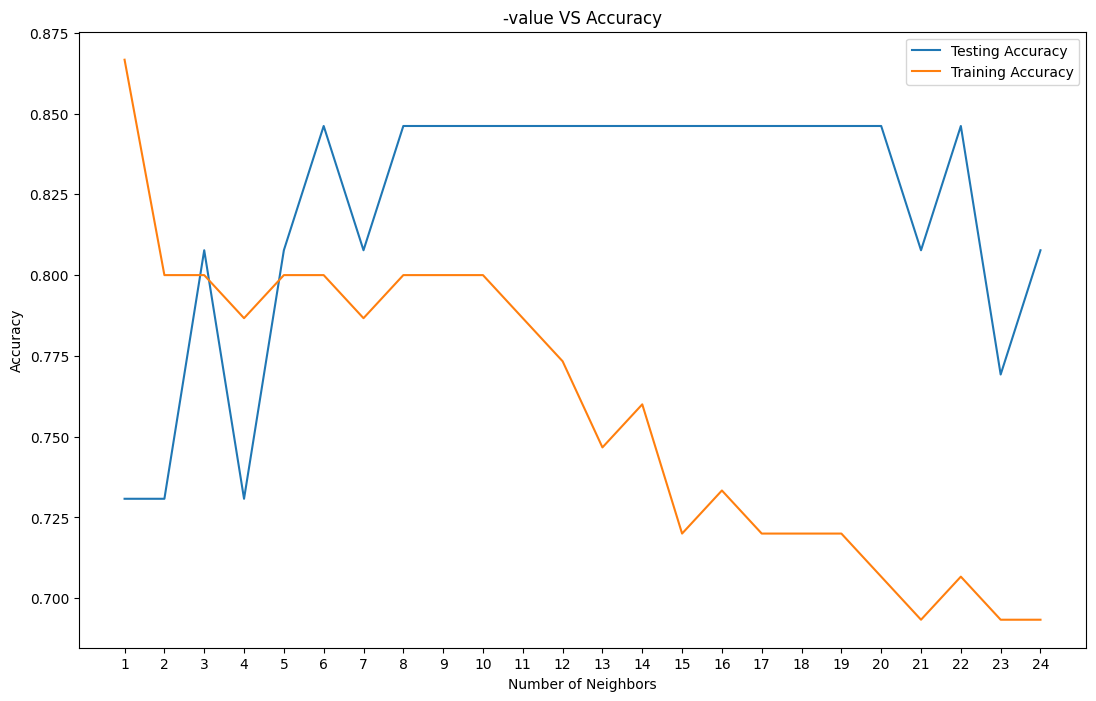

Best accuracy is 0.8461538461538461 with K = 6


In [ ]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))